In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///"+"hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)
# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Use Inspector to print the column names and types frpm measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Use Inspector to print the column names and types frpm measurement table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = max(session.query(Measurement.date))
print(recent_date)

('2017-08-23',)


In [20]:
results

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'U

In [12]:
import datetime

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

end_Date = recent_date[0]

# Calculate the date one year from the last date in data set.
start_Date = str(datetime.datetime.strptime(end_Date, '%Y-%m-%d').date() - datetime.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
            filter(Measurement.date>=start_Date, Measurement.date<=end_Date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_dict = {
            'ids': [result[0] for result in results],
            'station': [result[1] for result in results],
            'prcp': [result[3] for result in results],
            'tobs': [result[4] for result in results]
}

date = [result[2] for result in results]

data_df = pd.DataFrame(data_dict, index=date)


# Sort the dataframe by date
data_df = data_df.sort_index()
data_df.head(10)

,ids,station,prcp,tobs
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,5091,USC00513117,0.15,76.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-23,11851,USC00519523,0.02,80.0
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0


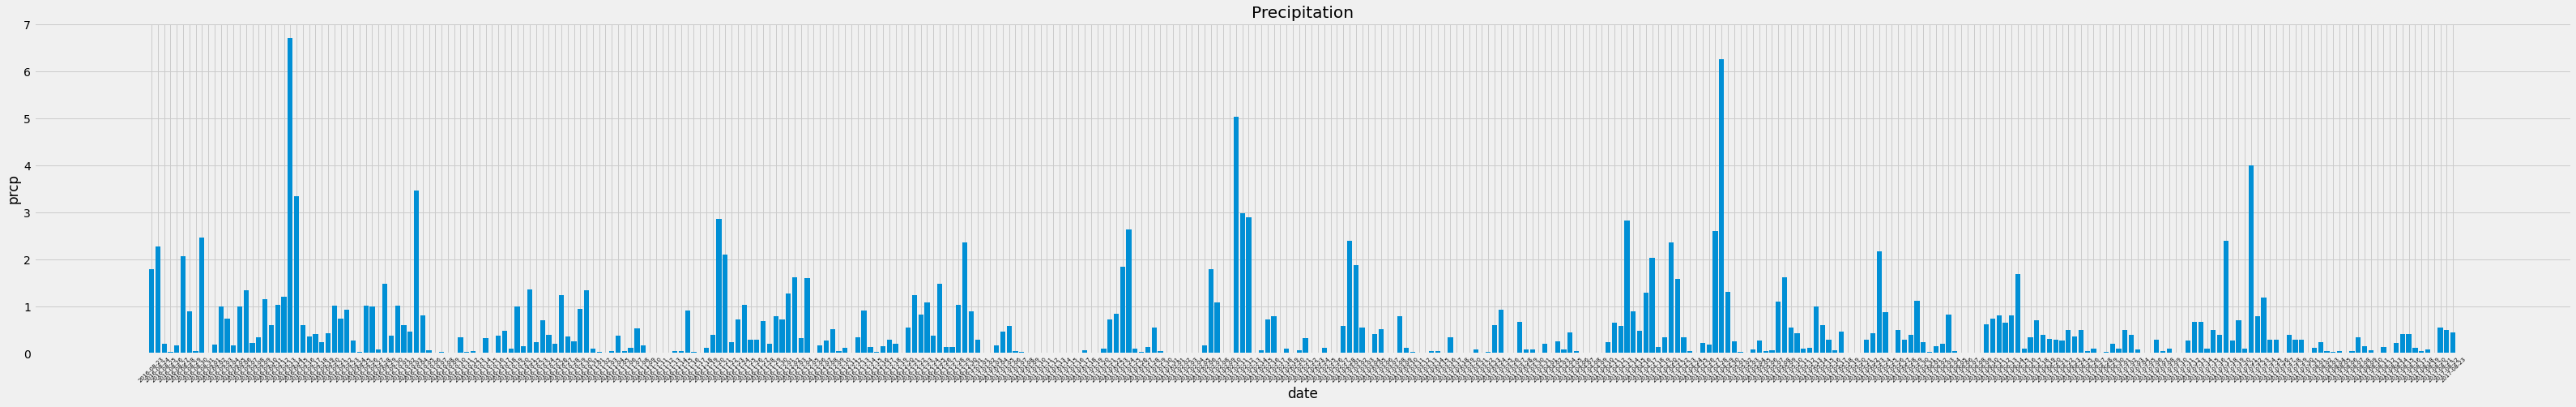

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(50,7))
plt.bar(data_df.index.values, data_df['prcp'])
ax.set_xlabel("date")
ax.set_ylabel("prcp")
plt.xticks(rotation='45',fontsize=7)
ax.set_title("Precipitation")
plt.show()

In [22]:
# creating year and month column to aggregate the data at year-month level
data_df = data_df.reset_index()
data_df['year'] = pd.DatetimeIndex(data_df['index']).year
data_df['month'] = pd.DatetimeIndex(data_df['index']).month

data_df['year_month'] = data_df['year'].map(str)+ '-' +data_df['month'].map(str)
data_df['year_month'] = pd.to_datetime(data_df['year_month'], format='%Y-%m').dt.strftime('%Y-%m')

data_df.head()

,index,ids,station,prcp,tobs,year,month,year_month
0,2016-08-23,2364,USC00519397,0.00,81.0,2016,8,2016-08
1,2016-08-23,8825,USC00517948,NaN,80.0,2016,8,2016-08
2,2016-08-23,14608,USC00519281,1.79,77.0,2016,8,2016-08
3,2016-08-23,7331,USC00514830,0.05,80.0,2016,8,2016-08
4,2016-08-23,5091,USC00513117,0.15,76.0,2016,8,2016-08


In [23]:
# calculating mean of prcp and tobs at year_month level
data_df_grouped = data_df.groupby('year_month').mean().loc[:,['prcp','tobs']]
data_df_grouped = data_df_grouped.reset_index()
data_df_grouped.head()

,year_month,prcp,tobs
0,2016-08,0.392642,78.135593
1,2016-09,0.285549,77.747368
2,2016-10,0.121620,77.196970
3,2016-11,0.120234,74.543011
4,2016-12,0.199494,71.130000


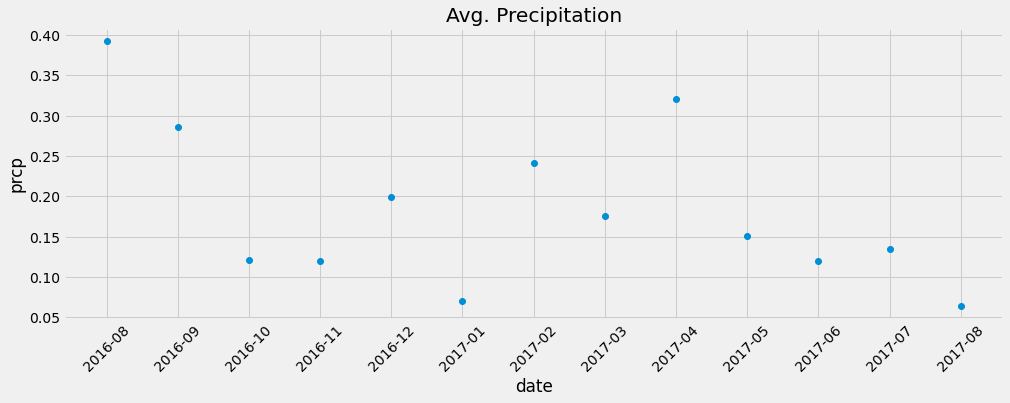

In [24]:
#Using matplotlib to build chart at aggregated level of prcp and tobs
data_df_grouped = data_df_grouped.sort_values('year_month')
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(data_df_grouped['year_month'], data_df_grouped['prcp'])
ax.set_xlabel("date")
ax.set_ylabel("prcp")
plt.xticks(rotation='45')
ax.set_title("Avg. Precipitation")
plt.show()

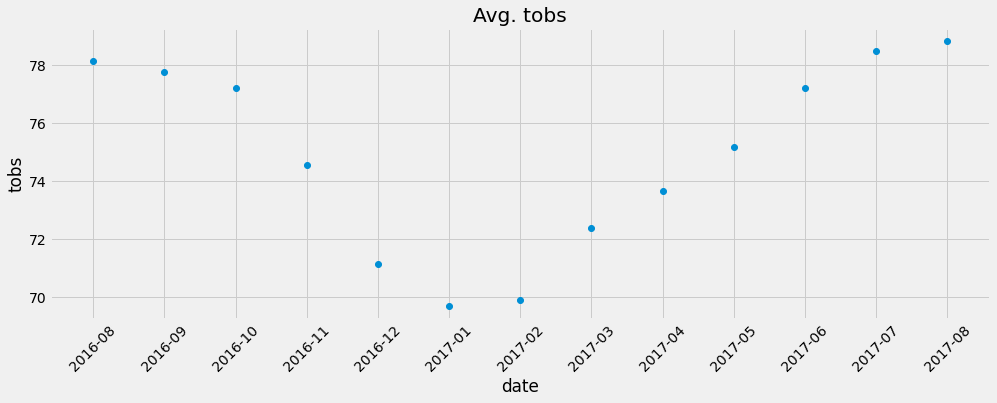

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot_date(data_df_grouped['year_month'], data_df_grouped['tobs'])
ax.set_xlabel("date")
ax.set_ylabel("tobs")
plt.xticks(rotation='45')
ax.set_title("Avg. tobs")
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,ids,prcp,tobs,year,month
count,2230.000000,2021.000000,2230.000000,2230.000000,2230.000000
mean,10158.570404,0.177279,74.590583,2016.626457,6.539013
std,5603.500203,0.461190,4.611667,0.483853,3.487857
min,2364.000000,0.000000,58.000000,2016.000000,1.000000
25%,5287.250000,0.000000,72.000000,2016.000000,4.000000
50%,8930.500000,0.020000,75.000000,2017.000000,7.000000
75%,14750.750000,0.130000,78.000000,2017.000000,10.000000
max,19550.000000,6.700000,87.000000,2017.000000,12.000000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()